# Práctica: Regresión Logística - Modelado Predictivo
## Escuela Superior de Cómputo - LCD
Alumno: Daniel Armas Ramírez


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [49]:
plt.style.use('tableau-colorblind10')

plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'font.family': 'sans-serif',
})

1. Carga de datos

In [26]:
df = pd.read_excel('./BirthWeight.xlsx', sheet_name='BirthWeight')
df.head()

,low,Gestation,Birthweight,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


2. Limpieza de datos

In [35]:
df.describe()

,low,Gestation,Birthweight,race,smoke,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.587302
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.214295
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3487.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   low          189 non-null    int64
 1   Gestation    189 non-null    int64
 2   Birthweight  189 non-null    int64
 3   race         189 non-null    int64
 4   smoke        189 non-null    int64
 5   ptl          189 non-null    int64
 6   ht           189 non-null    int64
 7   ui           189 non-null    int64
 8   ftv          189 non-null    int64
 9   bwt          189 non-null    int64
dtypes: int64(10)
memory usage: 14.9 KB


Muestra de los valores categóricos

In [38]:
for column in df.columns:
    if column not in ['Birthweight', 'Gestation', 'bwt']:
        print(f'{column}: {df[column].unique()}')

low: [0 1]
race: [2 3 1]
smoke: [0 1]
ptl: [0 1 2 3]
ht: [0 1]
ui: [1 0]
ftv: [0 3 1 2 4 6]


In [39]:
df.isnull().sum()

low            0
Gestation      0
Birthweight    0
race           0
smoke          0
ptl            0
ht             0
ui             0
ftv            0
bwt            0
dtype: int64

In [40]:
df.isna().sum()

low            0
Gestation      0
Birthweight    0
race           0
smoke          0
ptl            0
ht             0
ui             0
ftv            0
bwt            0
dtype: int64

Muestra de la distribución de clases

In [41]:
for column in df.columns:
    if column not in ['Birthweight', 'Gestation', 'bwt']:
        print(f'{column}: {df[column].value_counts()}')

low: low
0    130
1     59
Name: count, dtype: int64
race: race
1    96
3    67
2    26
Name: count, dtype: int64
smoke: smoke
0    115
1     74
Name: count, dtype: int64
ptl: ptl
0    159
1     24
2      5
3      1
Name: count, dtype: int64
ht: ht
0    177
1     12
Name: count, dtype: int64
ui: ui
0    161
1     28
Name: count, dtype: int64
ftv: ftv
0    100
1     47
2     30
3      7
4      4
6      1
Name: count, dtype: int64


C:\Users\magui\AppData\Local\Temp\ipykernel_23676\3612747246.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical[i], ax=ax, palette=['#432371',"#FAAE7B"])
C:\Users\magui\AppData\Local\Temp\ipykernel_23676\3612747246.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical[i], ax=ax, palette=['#432371',"#FAAE7B"])
C:\Users\magui\AppData\Local\Temp\ipykernel_23676\3612747246.py:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=categorical[i], ax=ax, palette=['#432371',"#FAAE7B"])
C:\Users\magui\AppData\Local\Temp\ipykernel_23676\3612747246

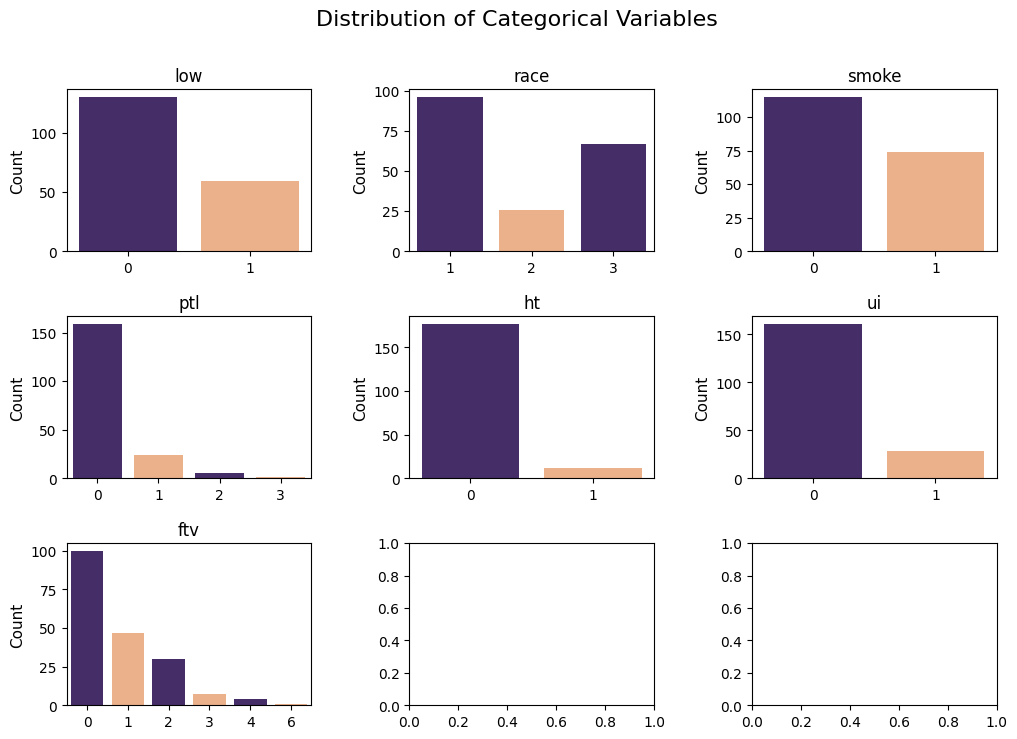

In [52]:
# make a subplot for each  distribution of the categorical variables
categorical = ['low', 'race', 'smoke', 'ptl', 'ht', 'ui', 'ftv']

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(7):
        ax = axes[i // 3, i % 3]
        sns.countplot(data=df, x=categorical[i], ax=ax, palette=['#432371',"#FAAE7B"])
        ax.set_title(categorical[i])
        ax.set_xlabel('')
        ax.set_ylabel('Count')

Matriz de correlación

Text(0.5, 1.0, 'Correlation Matrix')

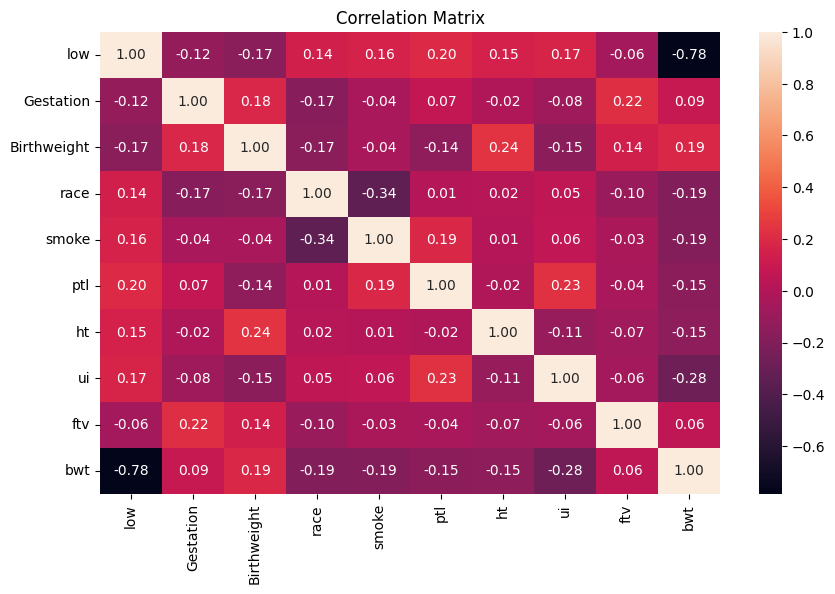

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')

2. Selección de variable dependiente e independientes

In [34]:
X = df[['race', 'smoke', 'ptl', 'ht', 'ui', 'ftv']].values
y = df['low'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

3. Escalamiento de características

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted')

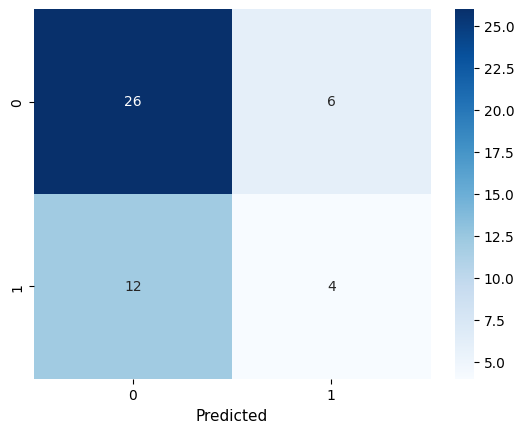

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')